## Machine Learning

## Supervised Learning Orange Quality Data

Nama Kelompok: Cheesecake

Nama Anggota: 
1. Nikita Aprilia Ozzari (23083010028)
2. Indira Zein Rizqin (23083010015)

## Random Forest

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("C://Users//Nikita Ozzari//Documents//Orange Quality Data.csv")
data.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [75]:
data.shape

(241, 11)

In [76]:
data = data.dropna()

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [78]:
total = data.isnull().sum().sort_values(ascending=False)
total

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

In [79]:
# Memisahkan fitur (X) dan target variabel (y)
X = data.drop(columns=['Quality (1-5)'])
y = data['Quality (1-5)']

In [80]:
# Mendapatkan semua kolom kategorikal
categorical_cols = X.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['Color', 'Variety', 'Blemishes (Y/N)'], dtype='object')


In [81]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
print(label_encoder)

LabelEncoder()


In [82]:
# Menerapkan LabelEncoder pada setiap kolom kategorikal
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

In [83]:
# Inisialisasi LabelEncoder untuk target (y)
label_encoder_y = LabelEncoder()

# Melakukan fit pada y (target)
y_encoded = label_encoder_y.fit_transform(y)

In [84]:
# Membagi data menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [85]:
# Membuat model Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [86]:
# Melakukan prediksi dan mengevaluasi model
y_pred = rf_model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")

# Menampilkan laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

Akurasi Model: 55.10%
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.33      0.33         3
           2       0.33      0.50      0.40         2
           3       0.00      0.00      0.00         5
           4       0.33      0.40      0.36         5
           5       0.59      0.67      0.62        15
           6       0.67      0.67      0.67         6
           7       0.69      0.82      0.75        11

    accuracy                           0.55        49
   macro avg       0.37      0.42      0.39        49
weighted avg       0.49      0.55      0.52        49



C:\Users\Nikita Ozzari\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nikita Ozzari\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nikita Ozzari\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
# Menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 0  0  0  0  1  1  0  0]
 [ 0  1  1  0  1  0  0  0]
 [ 0  0  1  0  0  1  0  0]
 [ 0  1  1  0  0  2  0  1]
 [ 1  1  0  0  2  0  1  0]
 [ 0  0  0  0  2 10  1  2]
 [ 0  0  0  0  0  1  4  1]
 [ 0  0  0  0  0  2  0  9]]


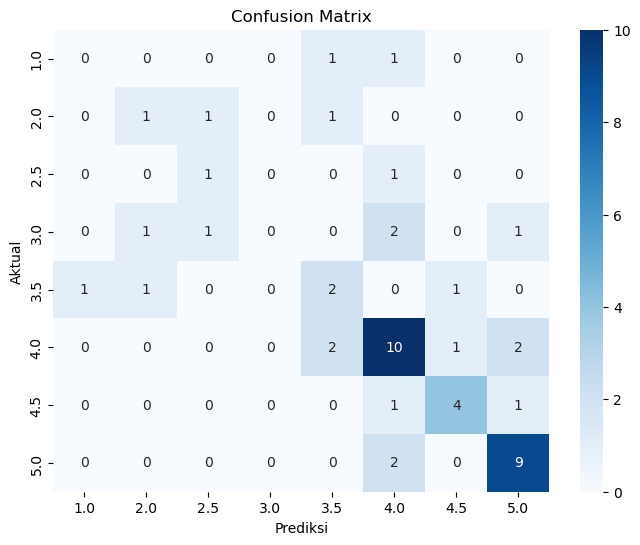

In [88]:
# Menampilkan confusion matrix dengan label yang sesuai
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder_y.classes_, yticklabels=label_encoder_y.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

In [91]:
# Menampilkan fitur penting (feature importance)
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan pentingnya fitur
print("Pentingnya Fitur:")
print(importance_df)

Pentingnya Fitur:
              Feature  Importance
2    Brix (Sweetness)    0.160615
3        pH (Acidity)    0.120649
4      Softness (1-5)    0.118005
1          Weight (g)    0.106599
5  HarvestTime (days)    0.101083
6      Ripeness (1-5)    0.093250
0           Size (cm)    0.080745
8             Variety    0.077162
9     Blemishes (Y/N)    0.076854
7               Color    0.065037


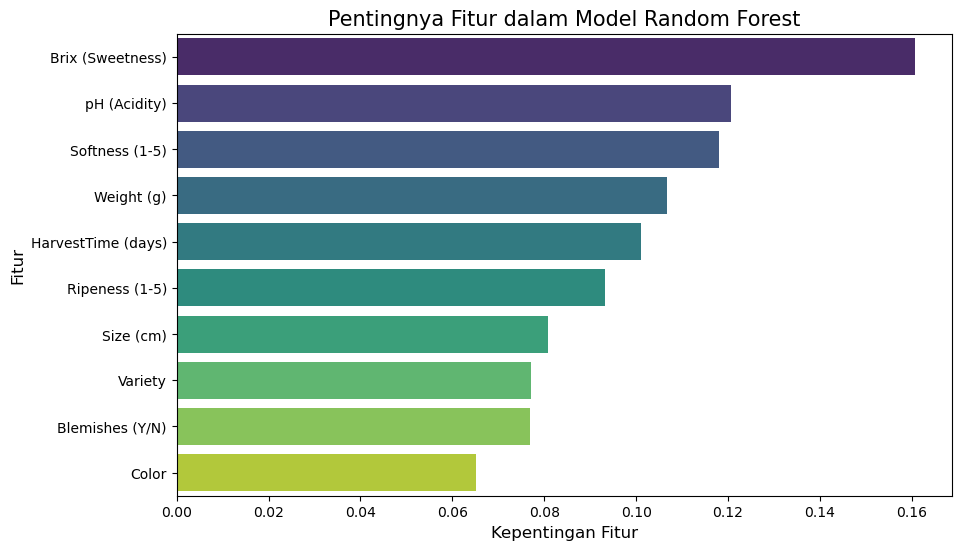

In [92]:
# Visualisasi feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Pentingnya Fitur dalam Model Random Forest', fontsize=15)
plt.xlabel('Kepentingan Fitur', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.show()

In [93]:
# Membuat DataFrame untuk menampilkan nilai aktual dan prediksi
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Menampilkan 5 baris pertama dari hasil
print(results.head())

   Actual  Predicted
0       6          5
1       3          5
2       6          6
3       3          2
4       4          4


## Kesimpulan: 
Model random forest menunjukkan kinerja yang baik dalam melakukan klasifikasi data dengan akurasi yang tinggi. Evaluasi melalui laporan klasifikasi dan confusion matrix menunjukkan bahwa model berhasil membedakan kelas dengan baik. Jadi random forest classifier efektif untuk klasifikasi data ini.

## Decision Tree dan Random Forest

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pd.read_csv("C://Users//Nikita Ozzari//Documents//Orange Quality Data.csv")
data.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [96]:
# Preprocessing
# Mengubah variabel kategorikal menjadi numerik
data_encoded = data.copy()
label_encoders = {}
for kolom in ['Color', 'Variety', 'Blemishes (Y/N)']:
    le = LabelEncoder()
    data_encoded[kolom] = le.fit_transform(data[kolom])
    label_encoders[kolom] = le

In [97]:
# Memisahkan fitur dan target
X = data_encoded.drop(columns=['Quality (1-5)'])
y = data_encoded['Quality (1-5)'].astype(int)
print(X, y)

     Size (cm)  Weight (g)  Brix (Sweetness)  pH (Acidity)  Softness (1-5)  \
0          7.5         180              12.0           3.2             2.0   
1          8.2         220              10.5           3.4             3.0   
2          6.8         150              14.0           3.0             1.0   
3          9.0         250               8.5           3.8             4.0   
4          8.5         210              11.5           3.3             2.5   
..         ...         ...               ...           ...             ...   
236        8.0         194              10.9           3.6             5.0   
237        7.4         275               8.5           3.5             5.0   
238        7.5         196              15.7           3.0             3.0   
239        7.2         251               9.8           4.3             3.0   
240        7.3         282              10.5           2.9             4.0   

     HarvestTime (days)  Ripeness (1-5)  Color  Variety  Blemis

In [98]:
# Membagi data menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [99]:
# Decision Tree Classifier
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
print(model_dt)
print(model_dt.fit)
print(y_pred_dt)
akurasi_dt = accuracy_score(y_test, y_pred_dt)

#Hasil Decision Tree
print(f"Akurasi: {akurasi_dt:.2f}")
print("Klasifikasi:")
print(classification_report(y_test, y_pred_dt))
print("Matriks:")
print(confusion_matrix(y_test, y_pred_dt))

DecisionTreeClassifier(random_state=42)
<bound method DecisionTreeClassifier.fit of DecisionTreeClassifier(random_state=42)>
[3 4 5 2 4 3 3 4 3 5 3 4 4 5 3 4 4 4 1 5 4 1 1 2 4 5 5 5 4 4 3 5 4 5 4 3 3
 4 4 5 4 4 3 5 4 3 5 2 3]
Akurasi: 0.55
Klasifikasi:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         5
           3       0.50      0.60      0.55        10
           4       0.74      0.67      0.70        21
           5       0.58      0.64      0.61        11

    accuracy                           0.55        49
   macro avg       0.36      0.38      0.37        49
weighted avg       0.55      0.55      0.55        49

Matriks:
[[ 0  0  1  1  0]
 [ 2  0  3  0  0]
 [ 1  2  6  1  0]
 [ 0  1  1 14  5]
 [ 0  0  1  3  7]]


In [100]:
# Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print(model_rf)
print(model_rf.fit)
print(y_pred_rf)
akurasi_rf = accuracy_score(y_test, y_pred_rf)

#Hasil Random Forest
print(f"Akurasi: {akurasi_rf:.2f}")
print("Klasifikasi:")
print(classification_report(y_test, y_pred_rf))
print("Matriks:")
print(confusion_matrix(y_test, y_pred_rf))

RandomForestClassifier(random_state=42)
<bound method BaseForest.fit of RandomForestClassifier(random_state=42)>
[3 4 4 2 4 3 3 4 3 4 3 4 4 4 2 2 4 4 2 5 4 3 4 2 4 4 4 5 4 4 4 5 4 5 4 4 3
 4 4 5 4 4 4 4 4 2 5 3 2]
Akurasi: 0.61
Klasifikasi:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.14      0.20      0.17         5
           3       0.62      0.50      0.56        10
           4       0.68      0.90      0.78        21
           5       0.83      0.45      0.59        11

    accuracy                           0.61        49
   macro avg       0.46      0.41      0.42        49
weighted avg       0.62      0.61      0.59        49

Matriks:
[[ 0  2  0  0  0]
 [ 0  1  2  2  0]
 [ 0  3  5  2  0]
 [ 0  1  0 19  1]
 [ 0  0  1  5  5]]


C:\Users\Nikita Ozzari\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nikita Ozzari\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nikita Ozzari\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
# Perbandingan
print("\n=== Perbandingan ===")
print(f"Akurasi Decision Tree: {akurasi_dt:.2f}")
print(f"Akurasi Random Forest: {akurasi_rf:.2f}")


=== Perbandingan ===
Akurasi Decision Tree: 0.55
Akurasi Random Forest: 0.61


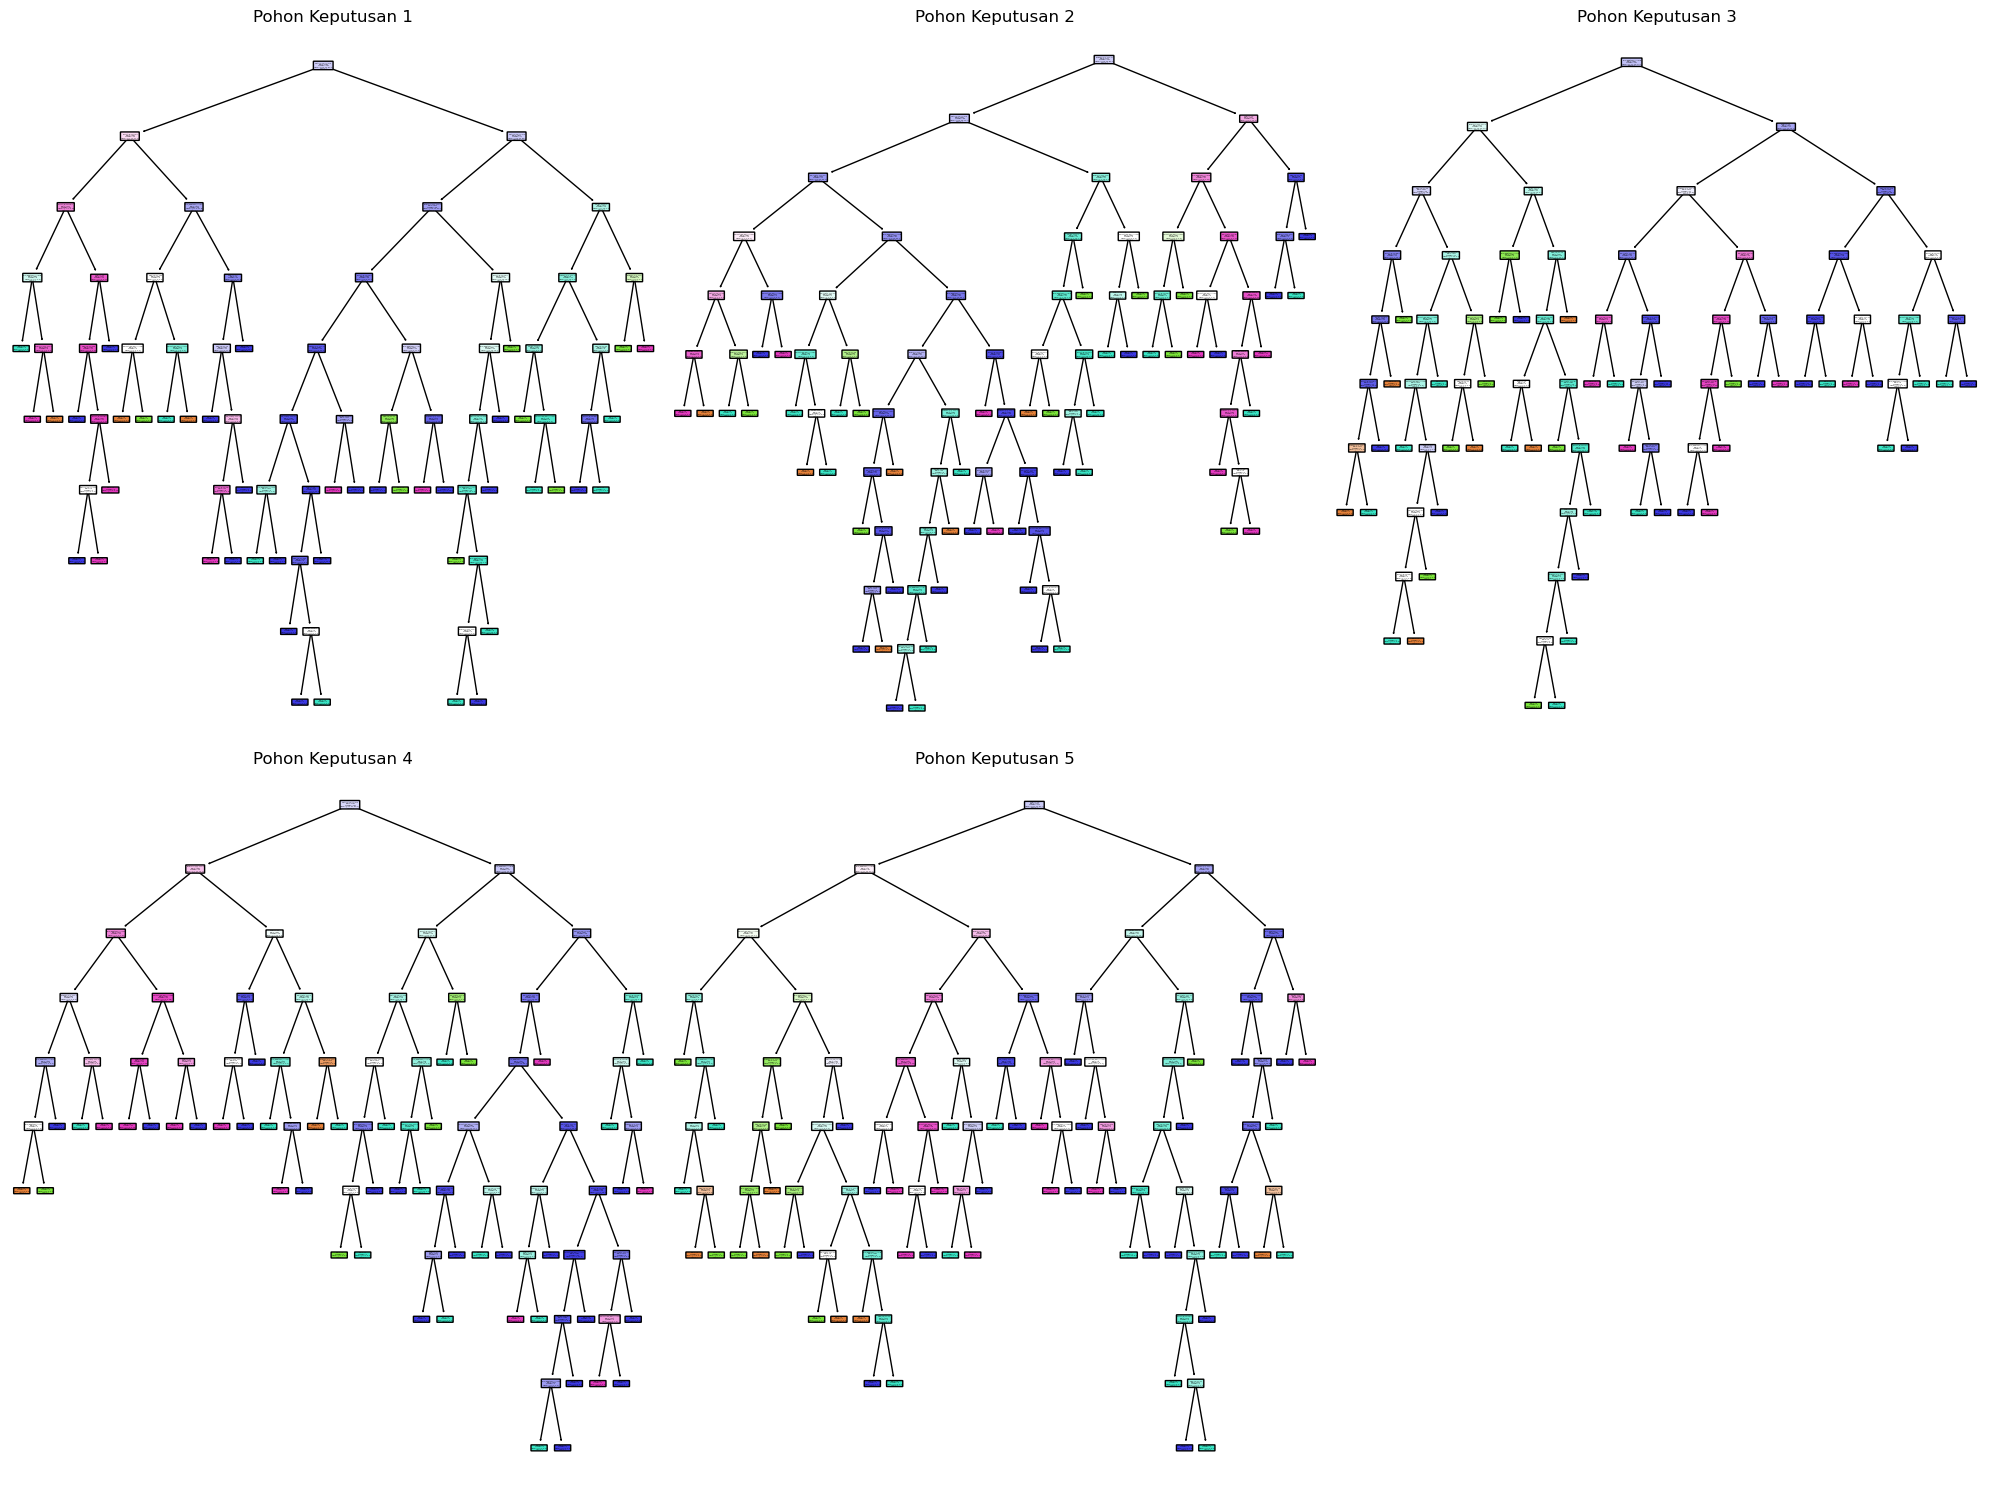

In [104]:
# Visualisasi decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pastikan X dan y tersedia
X = data_encoded.drop('Quality (1-5)', axis=1)
y = data_encoded['Quality (1-5)'].astype('int')  

# Jumlah pohon untuk diplot
n_trees_to_plot = 5

# Konversi kelas menjadi string untuk class_names
class_names = [str(i) for i in sorted(y.unique())]

feature_names = list(X.columns)

# Plot decision tree
plt.figure(figsize=(20, 15))
for i in range(min(n_trees_to_plot, len(model_rf.estimators_))):  
    plt.subplot(2, 3, i + 1)
    plot_tree(model_rf.estimators_[i], filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.title(f'Pohon Keputusan {i + 1}')

plt.tight_layout()
plt.show()

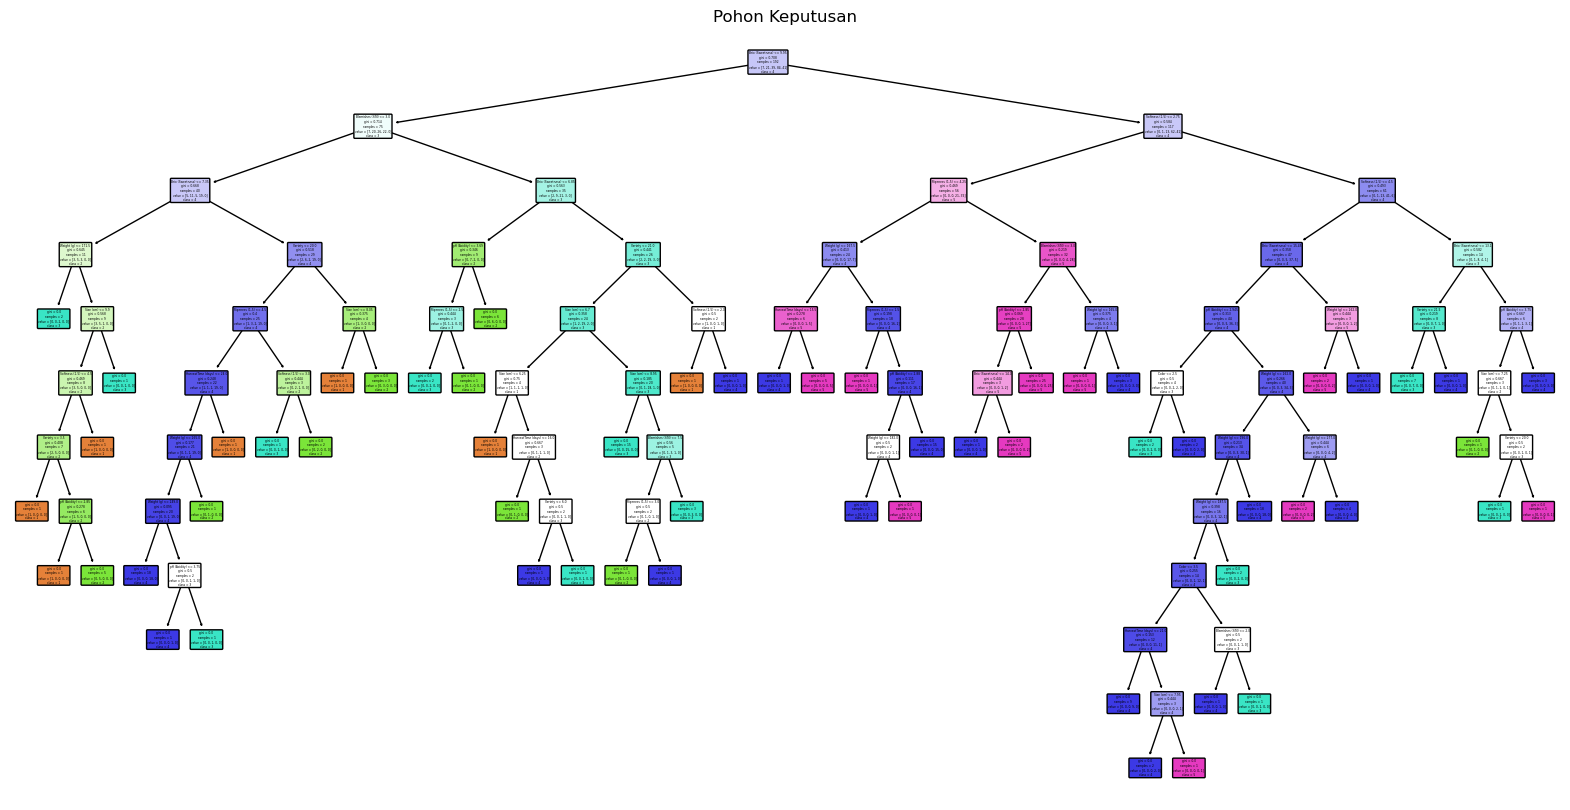

In [105]:
# Membuat model Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)  # Gunakan data pelatihan

#Konversi X.columns ke list
feature_names = list(X.columns)

# Pastikan class_names sesuai dengan target
class_names = [str(cls) for cls in model_dt.classes_]  # model_dt adalah DecisionTreeClassifier

# Plot decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    model_dt,  # Model decision tree
    filled=True,
    feature_names=feature_names,  # Ubah menjadi list
    class_names=class_names,  # Nama kelas
    rounded=True
)
plt.title("Pohon Keputusan")
plt.show()

Confusion Matrix:
[[ 0  2  0  0  0]
 [ 0  1  2  2  0]
 [ 0  3  5  2  0]
 [ 0  1  0 19  1]
 [ 0  0  1  5  5]]


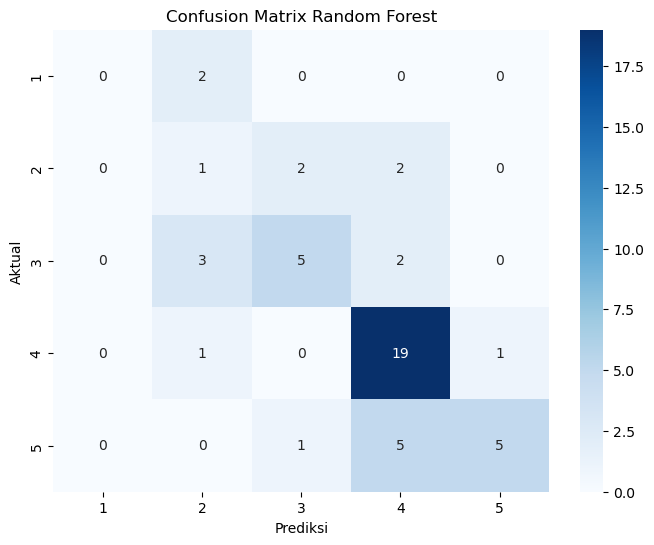

In [106]:
# Menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm)

# Visualisasi Confusion Matrix Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix Random Forest")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

              Feature  Importance
0           Size (cm)    0.078567
1          Weight (g)    0.109912
2    Brix (Sweetness)    0.199212
3        pH (Acidity)    0.109519
4      Softness (1-5)    0.100537
5  HarvestTime (days)    0.103566
6      Ripeness (1-5)    0.080974
7               Color    0.070610
8             Variety    0.080853
9     Blemishes (Y/N)    0.066251


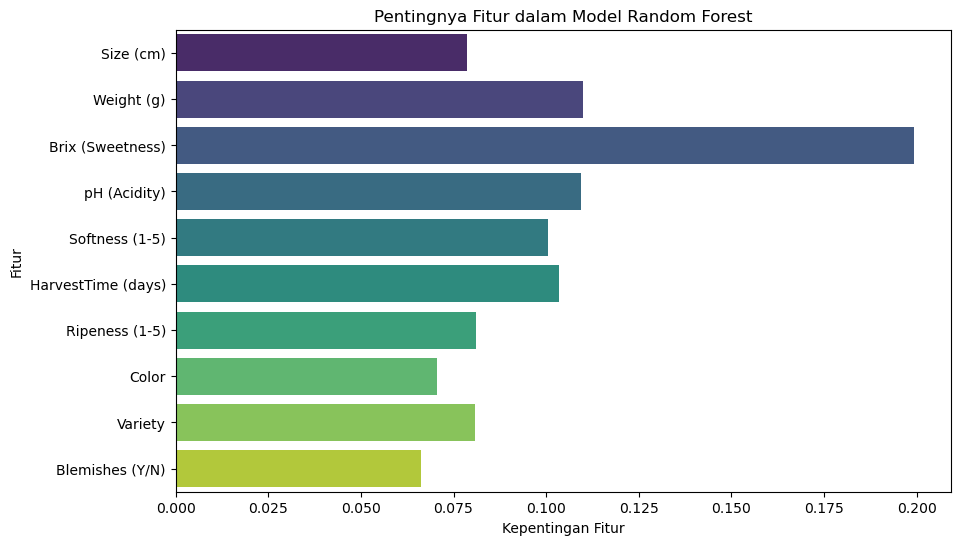

In [107]:
feature_importance = model_rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})
print(importance_df)

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features, palette="viridis")
plt.title("Pentingnya Fitur dalam Model Random Forest")
plt.xlabel("Kepentingan Fitur")
plt.ylabel("Fitur")
plt.show()

In [108]:
# Memilih model terbaik berdasarkan akurasi
if akurasi_dt > akurasi_rf:
    print("\nModel terbaik adalah Decision Tree.")
else:
    print("\nModel terbaik adalah Random Forest.")


Model terbaik adalah Random Forest.


### Kesimpulan:
Dari hasil diatas, model random forest lebih baik / lebih unggul dalam akurasi dan stabilitas dibandingkan decision tree. Random Forest memberikan gambaran yang lebih lengkap dan lebih stabil mengenai pentingnya fitur.